In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plotlib
%matplotlib inline

from IPython.display import display, Math, Latex,Markdown # rendering latex formula in code output

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC,LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_validate, learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import r2_score;
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_friedman1, make_friedman3
from sklearn.utils import check_random_state

In [2]:

plt.style.use('ggplot')

plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 24, 11
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.serif'] = "cm"

plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

In [3]:
def render_score_results(scores,score_name=" ",remaining_headers=[]):
    numberofpipes = scores.shape[1]-1-len(remaining_headers)
    pipeborder='|:---'*numberofpipes

    pipescores='&nbsp;|'*numberofpipes
    latexStr=f'Die Funktion{"&nbsp;"*40}| {score_name} '
    for header in remaining_headers:
        latexStr+="|"+ header
        pipeborder+=":---|"
    latexStr+=f"| {pipescores} \n"
    
    latexStr+= "---|"+pipeborder+"|\n"
    for score,func in zip(scores,function_list):
        latexStr +=f"{repr(func)} | {' | '.join(['{:.5f}'.format(item) for item in score])} \n"
    
    
    latexStr+=f"&nbsp; {pipescores} \n"
    latexStr += f"**Average Score:** | {scores.mean():.5f} \n"
    latexStr +=""
    a = display(Markdown(latexStr))
    
    
    
    
def render_score_results_T(scores,headers=[],):
#    print(scores.shape[1]-len(headers))
    for i in range( scores.shape[1]-len(headers)):
        headers.append('&nbsp;')
    numberofpipes=0
    
    pipeborder='|:---'*numberofpipes
    pipescores='&nbsp;|'*numberofpipes
    latexStr=""#f'{"&nbsp;"*40}|  '
    for header in headers:
        latexStr+="|"+ header
        pipeborder+=":---:|"
    latexStr+=f"| {pipescores} \n"
    
    latexStr+= ""+pipeborder+"\n"
    for score in scores:
        latexStr +=f" | {' | '.join(['{:.5f}'.format(item) for item in score])} \n"
    
    latexStr +=""
    a = display(Markdown(latexStr))



Run other Jupyter Notebook script with the nessesary function_definition

In [4]:
%run functions/functions.ipynb

Create a Random_state constant value to generate the data

In [5]:
RANDOM_STATE=362

Plot all Functions in the functions.ipynb

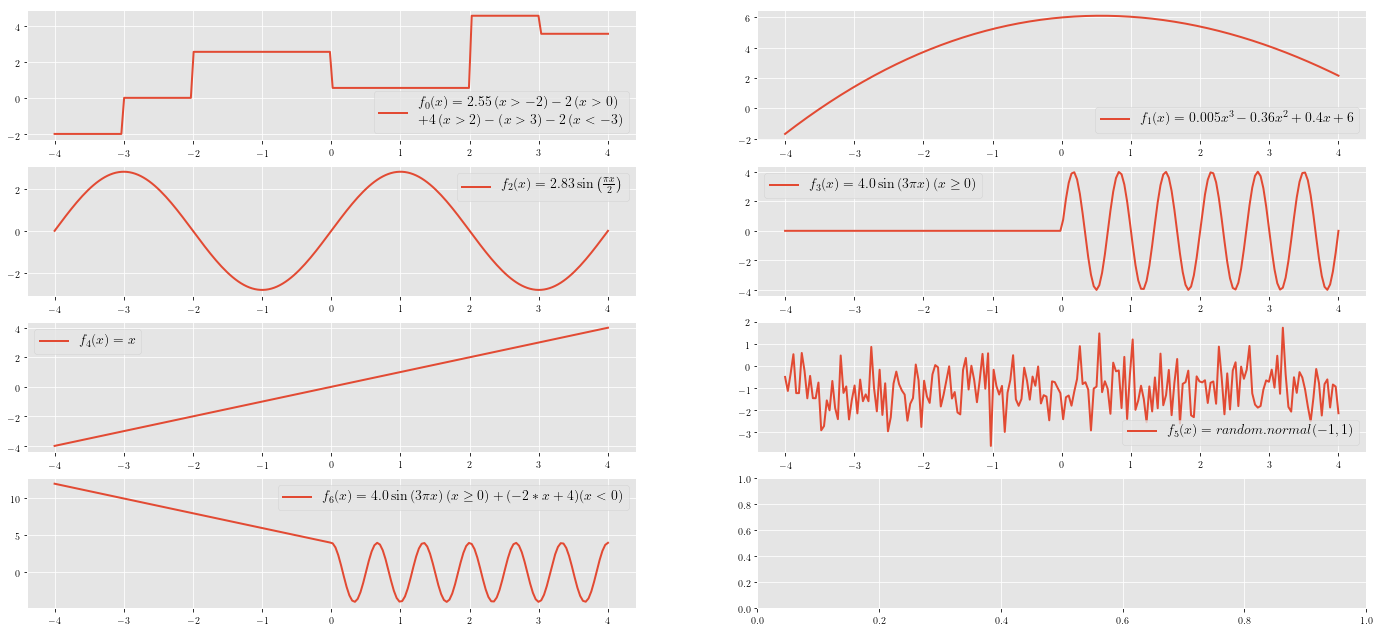

In [6]:
%run functions/functions.ipynb
fig, axes = plt.subplots(ncols=2, nrows=(len(function_list)+1)//2)
fig.set_size_inches(24,11)
for ax,func in zip(axes.flatten(), function_list):
    func.plot(ax)
    X1,y = func.make(noise=1, random_state=RANDOM_STATE)
    if (X1.shape[0] == 1): # if more than one input dont plot the results
       ax.plot(X1,y,'rp')
    ax.legend()

# Get optimal r2 scores for the Data 
by comparing the function with the Genereated data we can see what scores optimal models (without overfitting) would get

In [7]:
func = function_list[0]
num_of_repeats=5
results = np.zeros((len(function_list),num_of_repeats))
np.random.seed(RANDOM_STATE)

for j in range(num_of_repeats):
    
    for i, func in enumerate(function_list):
        X,y_noise = func.make(noise=1)
        y_real = func(X)
        results[i,j] = r2_score(y_pred=y_real, y_true=y_noise)
render_score_results(results,"R2_score")

Die Funktion&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| R2_score | &nbsp;|&nbsp;|&nbsp;|&nbsp;| 
---||:---|:---|:---|:---|
$f_{0}(x)=2.55 \left(x > -2\right) - 2 \left(x > 0\right)$
$  + 4 \left(x > 2\right) - \left(x > 3\right) - 2 \left(x < -3\right)$ | 0.81447 | 0.78767 | 0.79833 | 0.79518 | 0.84577 
$f_{1}(x)=0.005 x^{3} - 0.36 x^{2} + 0.4 x + 6$ | 0.79590 | 0.79641 | 0.78870 | 0.76909 | 0.81720 
$f_{2}(x)=2.83 \sin{\left (\frac{\pi x}{2} \right )}$ | 0.84222 | 0.79149 | 0.80993 | 0.80385 | 0.78360 
$f_{3}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right)$ | 0.81234 | 0.78211 | 0.81986 | 0.79808 | 0.85178 
$f_{4}(x)=x$ | 0.84465 | 0.84460 | 0.85087 | 0.84298 | 0.82331 
$f_{5}(x) = random.normal(-1, 1)$ | -0.36250 | -0.35076 | -0.48477 | -0.52851 | -0.39575 
$f_{6}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right) + (-2 * x + 4) ( x < 0)$ | 0.96048 | 0.95870 | 0.96566 | 0.96312 | 0.95987 
&nbsp; &nbsp;|&nbsp;|&nbsp;|&nbsp;| 
**Average Score:** | 0.65703 


As seen in the Results the optimal results cant be 1 
Because the data has Noise in it therefore a value of 1 would be able to predict random noise (overfitting)

also to predict a random function with a random guessing will not give a good result

The other values depend on the Random state as well as the noise value

# Ordinary least squares Linear Regression.

In [8]:
linear_regression = LinearRegression()

# Random Forrest

In [9]:
random_forrest = RandomForestRegressor(n_estimators=10,random_state=RANDOM_STATE)

# Making Cross validation  for better results 

Probably should split the Data in a training and test set to simulate Overfitting on new Data

so From now on the Results are cross validated results for each function

Also adding Rmse root mean squared error

In [10]:
def rmsle_cv(model,X,y,n_folds=5):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = n_folds))
    return(rmse)
                 
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def r2_cv(model,X,y,cv=5):
    return cross_val_score(model,X,y, scoring="r2",cv=cv)



def r2_scores_cv(model,n_folds=5):
    model_scores = np.zeros((len(function_list),n_folds))
  
    for i, func in enumerate(function_list):
        kf = KFold(n_folds, shuffle=True)
        X,y_noise = func.make(noise=1)
        model_scores[i] = r2_cv(model,X,y_noise,cv=kf)
    return model_scores
    

# Hypothesis
r2 Scores will be lower for both models but linear regression has a better score at $f_4(x)$ than Random Forrest 
also Random forrest scores at Random model will be inconsistent 



# R2 cross validated scores for Linear Regression

Better Layout using Tables so its more readable

In [11]:
np.random.seed(10293)
num_of_repeats=5



r2_score_lin_cv = r2_scores_cv(linear_regression)
scores_and_mean =  np.row_stack((r2_score_lin_cv))
#scores_and_mean =  scores_and_mean.row_stack(( r2_score_lin_cv))

#print(scores_and_mean.shape)
#print(r2_score_lin_cv.shape)
for i in range(1,num_of_repeats):
    r2_score_lin_cv = r2_scores_cv(linear_regression)
    mean_r2_score = r2_score_lin_cv.mean(1)

    scores_and_mean =  np.column_stack((scores_and_mean, r2_score_lin_cv))
 
    
print("R^2 Scores")



render_score_results_T(scores_and_mean.T, ["$"+str(func)+"$" for func in function_list])

mean =scores_and_mean.mean(1)
mean = np.reshape(mean,(8,-11))

render_score_results_T(mean.T, ["$"+str(func)+"$" for func in function_list])


#print(scores_and_mean)

R^2 Scores


|$$f_{0}(x)=2.55 \left(x > -2\right) - 2 \left(x > 0\right)$
$  + 4 \left(x > 2\right) - \left(x > 3\right) - 2 \left(x < -3\right)$$|$$f_{1}(x)=0.005 x^{3} - 0.36 x^{2} + 0.4 x + 6$$|$$f_{2}(x)=2.83 \sin{\left (\frac{\pi x}{2} \right )}$$|$$f_{3}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right)$$|$$f_{4}(x)=x$$|$$f_{5}(x) = random.normal(-1, 1)$$|$$f_{6}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right) + (-2 * x + 4) ( x < 0)$$|  
:---:|:---:|:---:|:---:|:---:|:---:|:---:|
 | 0.24555 | 0.31468 | 0.11545 | -0.00693 | 0.79901 | -0.00203 | 0.67086 
 | 0.49948 | 0.07626 | 0.11366 | -0.00164 | 0.77822 | 0.00409 | 0.81793 
 | 0.25681 | 0.32756 | 0.10454 | -0.02054 | 0.83287 | -0.00538 | 0.77231 
 | 0.47036 | -0.11159 | 0.25396 | -0.00195 | 0.86677 | -0.09606 | 0.71658 
 | 0.52101 | 0.20780 | 0.32529 | -0.01879 | 0.84716 | -0.05852 | 0.46906 
 | 0.43228 | 0.23772 | 0.14385 | -0.04271 | 0.87818 | -0.00118 | 0.64807 
 | 0.28597 | 0.18238 | 0.15125 | -0.01064 | 0.81444 | -0.05616 | 0.68989 
 | 0.45192 | 0.29136 | 0.05787 | -0.02925 | 0.85898 | -0.04402 | 0.74308 
 | 0.18596 | 0.00796 | 0.00408 | -0.01204 | 0.78969 | -0.03662 | 0.66503 
 | 0.26631 | 0.24370 | 0.02240 | -0.00329 | 0.80279 | -0.05102 | 0.63910 
 | 0.43266 | -0.14668 | 0.19589 | 0.01636 | 0.82973 | -0.05929 | 0.67050 
 | 0.00721 | 0.37037 | 0.06378 | -0.10626 | 0.85877 | 0.00123 | 0.76506 
 | 0.36958 | 0.37310 | 0.07172 | -0.01164 | 0.75136 | -0.03444 | 0.48223 
 | 0.33455 | 0.20522 | 0.08467 | -0.08680 | 0.81943 | -0.03421 | 0.79129 
 | 0.39581 | 0.27513 | 0.02929 | -0.06168 | 0.87334 | -0.05840 | 0.77449 
 | 0.44009 | 0.25114 | 0.19371 | -0.04747 | 0.83758 | -0.17962 | 0.65932 
 | 0.52497 | 0.30428 | 0.09867 | -0.02470 | 0.83685 | -0.02916 | 0.68606 
 | 0.43690 | 0.21185 | 0.19703 | -0.05238 | 0.88282 | -0.01699 | 0.69352 
 | 0.50701 | 0.34082 | 0.14559 | -0.02242 | 0.78114 | -0.03313 | 0.74007 
 | 0.55723 | -0.13867 | 0.14727 | 0.02846 | 0.79086 | -0.02186 | 0.81578 
 | 0.60693 | 0.19876 | 0.17623 | -0.05373 | 0.82203 | -0.01461 | 0.39745 
 | 0.60975 | 0.03972 | 0.04194 | -0.08937 | 0.84149 | -0.07350 | 0.61860 
 | 0.23966 | 0.10878 | 0.29661 | -0.04429 | 0.80854 | -0.02227 | 0.62374 
 | 0.51457 | 0.33911 | 0.13256 | -0.01384 | 0.80973 | -0.07999 | 0.73679 
 | 0.14792 | 0.19237 | 0.27444 | -0.06495 | 0.84452 | -0.02635 | 0.57693 


ValueError: cannot reshape array of size 7 into shape (8,newaxis)

# Linear Regression Results
The Mean Scores are worse than the previous one $f_4(x)$ is still the best data to Predict for the linar model as expected

# lets see for Random Forrest

First reset the Random state for this part of the test 

In [12]:
random_forrest = RandomForestRegressor(n_estimators=10,random_state=RANDOM_STATE)

## R2 Cross Validated for Random Forrest

### Hypothesis
Scores are worse Overall

best score is $f_1(X)$ or function $f_4(X)$


In [13]:


r2_score_lin_cv = r2_scores_cv(random_forrest)
scores_and_mean =  np.row_stack((r2_score_lin_cv))

for i in range(1,num_of_repeats):
    r2_score_lin_cv = r2_scores_cv(random_forrest)
    mean_r2_score = r2_score_lin_cv.mean(1)

    scores_and_mean =  np.column_stack((scores_and_mean, r2_score_lin_cv))
 


render_score_results_T(scores_and_mean.T, ["$"+str(func)+"$" for func in function_list])
mean =scores_and_mean.mean(1)
mean = np.reshape(mean,(8,-11))

render_score_results_T(mean.T, ["$"+str(func)+"$" for func in function_list])


|$$f_{0}(x)=2.55 \left(x > -2\right) - 2 \left(x > 0\right)$
$  + 4 \left(x > 2\right) - \left(x > 3\right) - 2 \left(x < -3\right)$$|$$f_{1}(x)=0.005 x^{3} - 0.36 x^{2} + 0.4 x + 6$$|$$f_{2}(x)=2.83 \sin{\left (\frac{\pi x}{2} \right )}$$|$$f_{3}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right)$$|$$f_{4}(x)=x$$|$$f_{5}(x) = random.normal(-1, 1)$$|$$f_{6}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right) + (-2 * x + 4) ( x < 0)$$|  
:---:|:---:|:---:|:---:|:---:|:---:|:---:|
 | 0.75904 | 0.78385 | 0.72956 | 0.42288 | 0.81348 | -0.17046 | 0.92203 
 | 0.62796 | 0.78614 | 0.77656 | 0.69430 | 0.83133 | -0.32411 | 0.92271 
 | 0.54689 | 0.83036 | 0.65874 | 0.42614 | 0.68041 | -1.19017 | 0.92039 
 | 0.09795 | 0.66830 | 0.64570 | 0.54295 | 0.74407 | -0.99673 | 0.93112 
 | 0.75951 | 0.77396 | 0.66354 | 0.63489 | 0.81593 | -0.20405 | 0.91834 
 | 0.61711 | 0.71924 | 0.69998 | 0.64379 | 0.67204 | -1.07044 | 0.91428 
 | 0.33820 | 0.79763 | 0.52604 | 0.62500 | 0.64862 | -0.95189 | 0.92239 
 | 0.59202 | 0.62821 | 0.62754 | 0.58771 | 0.69954 | -0.94327 | 0.93529 
 | 0.73107 | 0.64419 | 0.60223 | 0.30147 | 0.85044 | -0.34160 | 0.93626 
 | 0.78048 | 0.84244 | 0.63711 | 0.65147 | 0.74773 | -0.27113 | 0.94247 
 | 0.68837 | 0.74959 | 0.67268 | 0.53089 | 0.66907 | -0.53517 | 0.86393 
 | 0.47745 | 0.71648 | 0.54821 | 0.65142 | 0.70262 | -0.47174 | 0.92061 
 | 0.75132 | 0.63052 | 0.75759 | 0.73995 | 0.81179 | -0.34013 | 0.89928 
 | 0.61558 | 0.44608 | 0.61494 | 0.70908 | 0.77180 | -0.29097 | 0.93545 
 | 0.40706 | 0.67137 | 0.65831 | 0.60904 | 0.76804 | -1.18717 | 0.92839 
 | 0.76325 | 0.78037 | 0.73021 | 0.71932 | 0.81129 | -0.41814 | 0.90440 
 | 0.72732 | 0.84934 | 0.62729 | 0.61899 | 0.74088 | -0.50757 | 0.95045 
 | 0.77876 | 0.68463 | 0.78585 | 0.47329 | 0.81020 | -0.01536 | 0.90094 
 | 0.72694 | 0.70988 | 0.60114 | 0.77769 | 0.71067 | -0.41107 | 0.90054 
 | 0.73539 | 0.68230 | 0.41599 | 0.34129 | 0.77333 | -0.20650 | 0.93667 
 | 0.75840 | 0.82621 | 0.61888 | 0.70899 | 0.75287 | -0.51004 | 0.90713 
 | 0.73943 | 0.69313 | 0.58463 | 0.65931 | 0.71272 | -0.11153 | 0.95371 
 | 0.70833 | 0.52728 | 0.56398 | 0.77899 | 0.79626 | -0.49658 | 0.92304 
 | 0.53888 | 0.45976 | 0.66359 | 0.43549 | 0.77524 | -0.99374 | 0.92432 
 | 0.39907 | 0.73135 | 0.60984 | 0.73570 | 0.83814 | -0.42583 | 0.88392 


ValueError: cannot reshape array of size 7 into shape (8,newaxis)

# Results

These Results make More sense than the non Cross validated Version and without a Split in test and Training Data.
So it was overfitting on the Data
these Results are also more realistic espacially the random.normal result.

also the two best models are $f_4(x)$ and $f_2(x)$ i expected $f_1(x)$ to be one of the top 2 best to predict formula for random forrest.

also linear Regression Performs better at $f_4(x)$ than Random Forrest. (Probably Better result with Stacking maybe ?)
as well as the $f_3(X)$ and the $f_2(X)$ 

also Random forrst performs better at f3 than linear regression so.


# Training Curves to check for Overfitting test based on Hands on Machine Learning with scikit-learn & trensorflow form Aurelien Geron

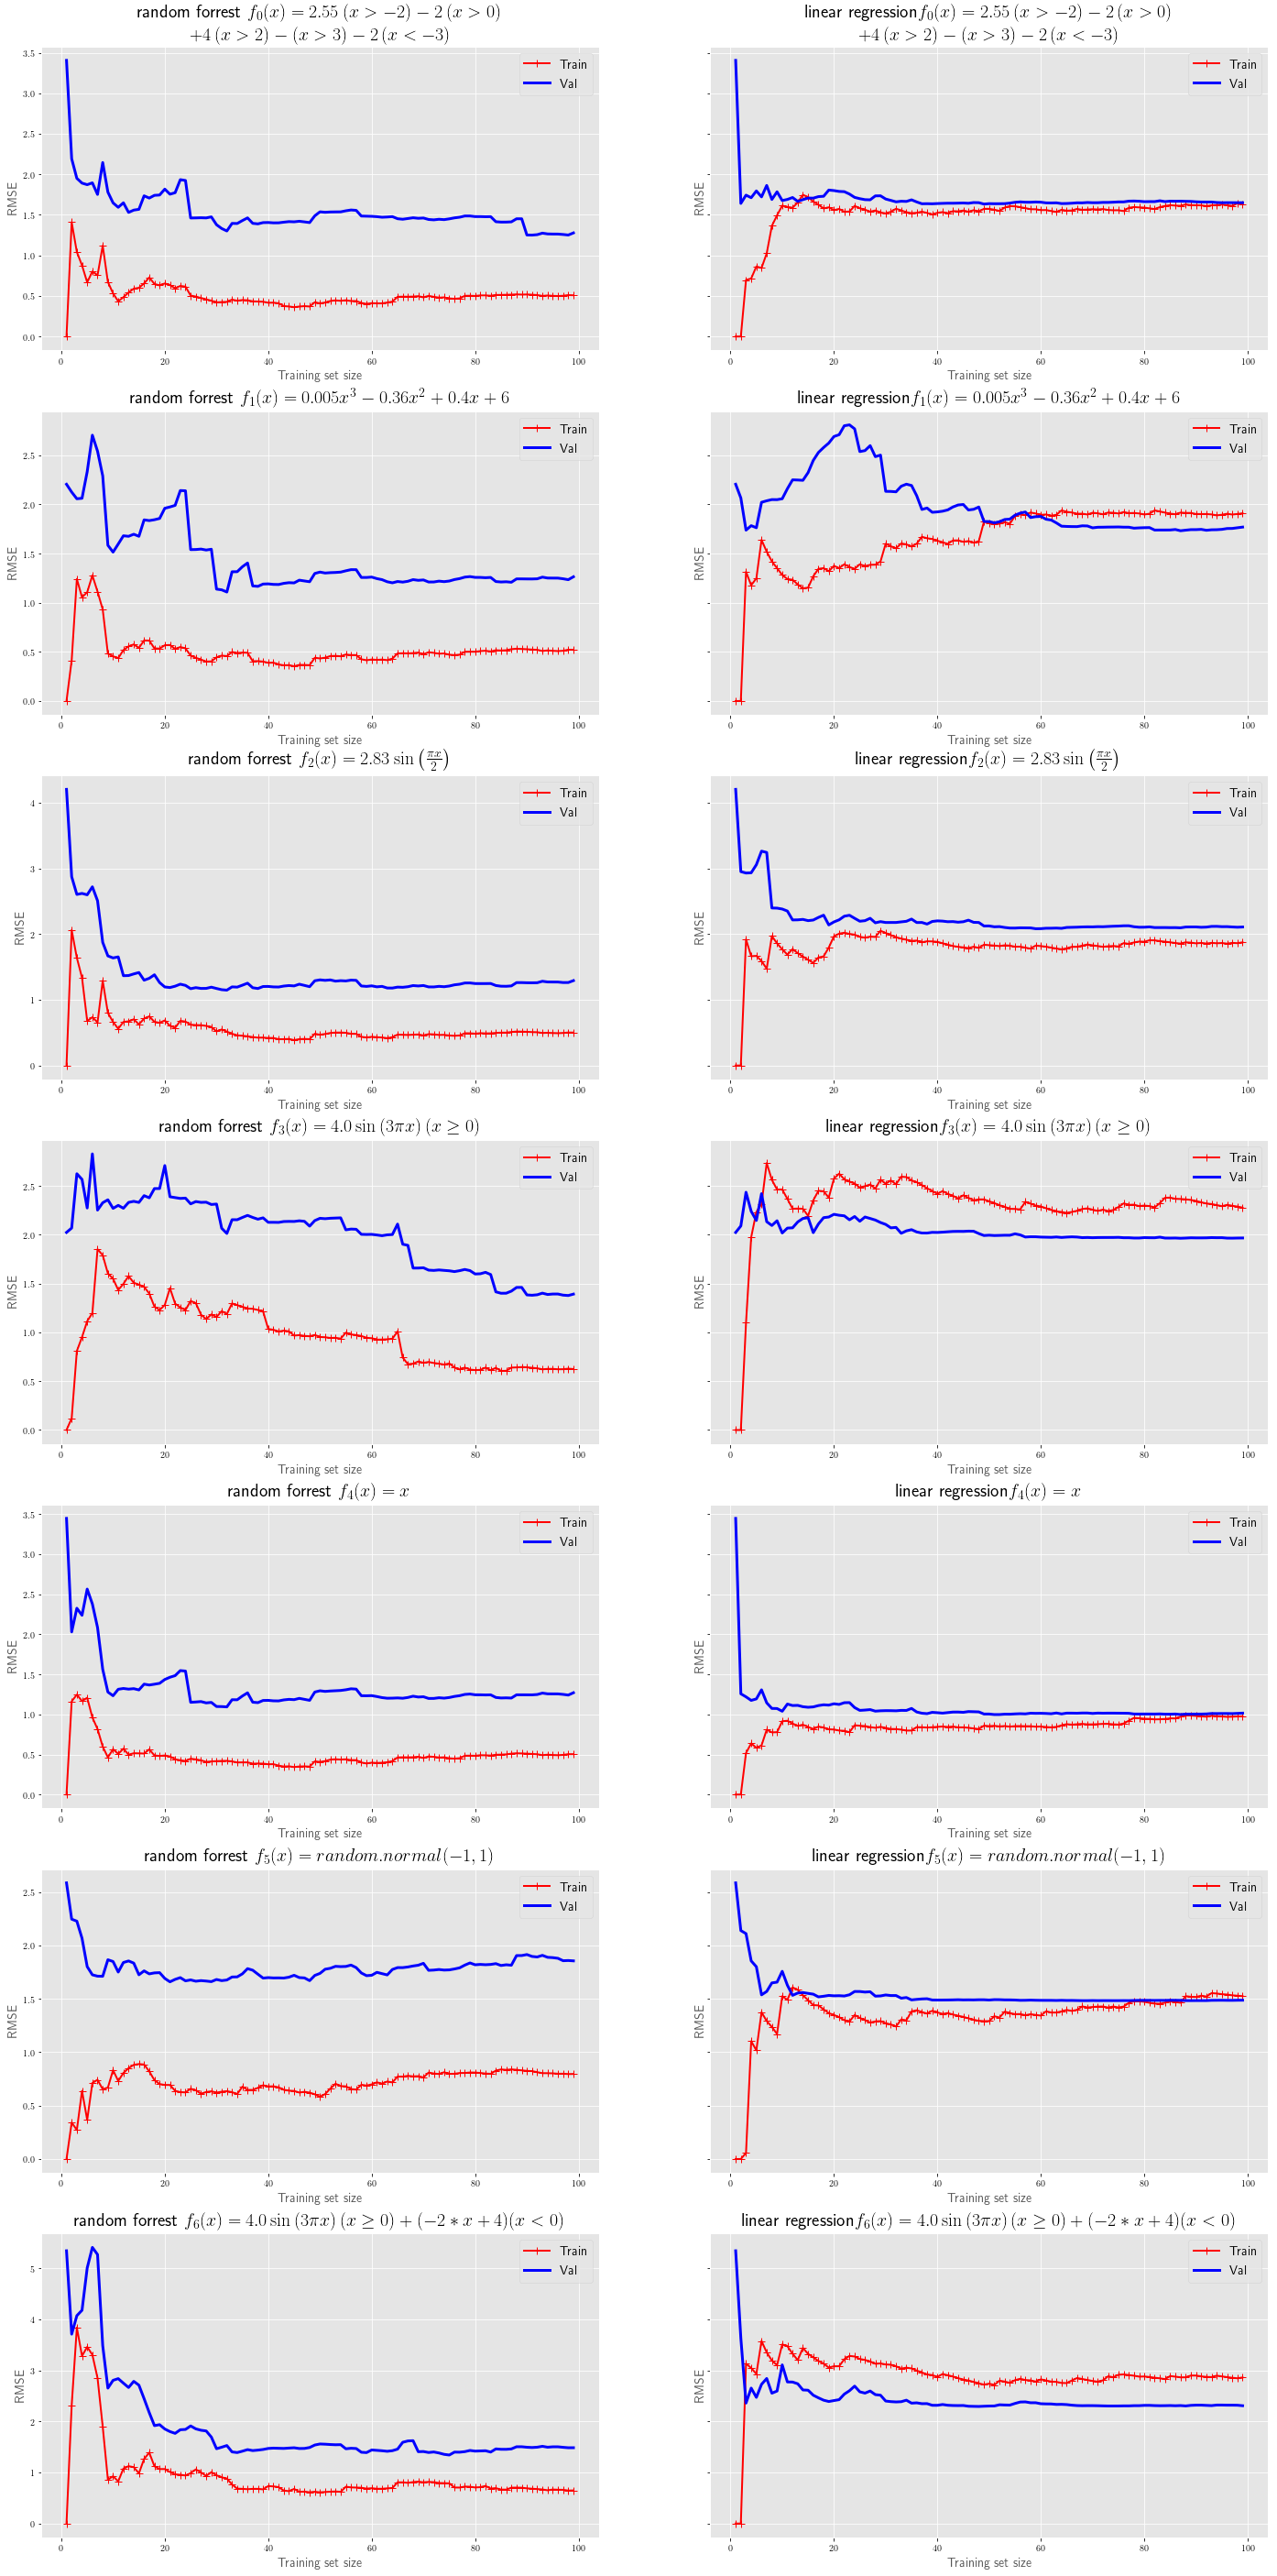

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y,ax):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.5,random_state=RANDOM_STATE)
    # trainings daten sollen unsortiert sein wenn möglich stratified 
    train_errors, val_errors,x_values = [], [],[]
    
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        x_values.append(m)
        
        
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))

    ax.plot(x_values,np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    ax.plot(x_values, np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    ax.legend(loc="upper right", fontsize=14)   # not shown in the book
    ax.set_xlabel("Training set size", fontsize=14) # not shown
    ax.set_ylabel("RMSE", fontsize=14)              # not shown
    ax.legend()
    
fig, axes = plt.subplots(ncols=2, nrows=(len(function_list)),sharey='row')
fig.set_size_inches(24,50)
for ax,func in zip(axes, function_list):
    X,y_noise = func.make(noise=1, random_state=RANDOM_STATE)
  
    random_forrest = RandomForestRegressor(n_estimators=10,random_state=RANDOM_STATE)
    plot_learning_curves(random_forrest, X,y_noise,ax[0])
    ax[0].set_title("random forrest "+ repr(func))
    
    linear_regression = LinearRegression()
    plot_learning_curves(linear_regression,X,y_noise, ax[1])
    ax[1].set_title("linear regression"+ repr(func))



In [15]:
X,y_noise = function_list[0].make(noise=1, random_state=RANDOM_STATE)
scoring = ['r2', 'neg_mean_squared_error']
res = cross_validate(random_forrest,X,y_noise,scoring=scoring, return_train_score=True,cv=5,return_estimator=False)



In [16]:
string = ""
ssnl ="\n"

for func in  function_list:
    string += repr(func)
    for i,score in enumerate(scoring):
        X,y_noise = func.make(noise=1, random_state=RANDOM_STATE)
        res = cross_validate(random_forrest,X,y_noise,scoring=scoring, return_train_score=True,cv=5)
        
    
       
        string += "\n\n"
        string += f"| {score} score | {'&nbsp;|'*4 }\n"
        string += f"|---| {'---:|'*4 }\n"

        string += f"|test| {'|'.join(['{:.5f}'.format(number)  for number in res['test_'+score]])} \n"
        string += f"|train| {'|'.join(['{:.5f}'.format(number)  for number in res['train_'+score]])} \n"
        string += "\n\n"
        #string += r"\text{test } & "+ str(res['test_'+score]).replace(" ","\quad") +ssnl
        #string += r"\text{train } & "+ str(res['train_'+score]).replace(" ", "\quad") +ssnl      

#print(string)
a = display(Markdown(string))

$f_{0}(x)=2.55 \left(x > -2\right) - 2 \left(x > 0\right)$
$  + 4 \left(x > 2\right) - \left(x > 3\right) - 2 \left(x < -3\right)$

| r2 score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| 0.76509|0.65316|0.77137|0.66184|0.64663 
|train| 0.93894|0.95606|0.94465|0.95112|0.94897 




| neg_mean_squared_error score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| -1.49256|-1.95018|-0.97347|-1.49722|-1.97572 
|train| -0.30894|-0.22813|-0.30719|-0.27073|-0.26812 


$f_{1}(x)=0.005 x^{3} - 0.36 x^{2} + 0.4 x + 6$

| r2 score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| 0.75112|0.56298|0.78314|0.37732|0.67825 
|train| 0.93607|0.95227|0.93862|0.95080|0.94488 




| neg_mean_squared_error score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| -1.45178|-1.78727|-0.99665|-1.48964|-1.89973 
|train| -0.27829|-0.22956|-0.28854|-0.25487|-0.23972 


$f_{2}(x)=2.83 \sin{\left (\frac{\pi x}{2} \right )}$

| r2 score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| 0.66127|0.61600|0.77881|0.66239|0.64018 
|train| 0.94558|0.94973|0.94321|0.95062|0.95037 




| neg_mean_squared_error score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| -1.48186|-1.82131|-0.92614|-1.49728|-1.92023 
|train| -0.27449|-0.23187|-0.28974|-0.24864|-0.23435 


$f_{3}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right)$

| r2 score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| 0.55278|0.61442|0.79459|0.58403|0.60405 
|train| 0.93229|0.93752|0.92124|0.93677|0.93364 




| neg_mean_squared_error score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| -1.88731|-1.83027|-0.89205|-1.59661|-1.94102 
|train| -0.31448|-0.27736|-0.36225|-0.29663|-0.29220 


$f_{4}(x)=x$

| r2 score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| 0.81250|0.72946|0.82987|0.65615|0.74875 
|train| 0.95453|0.96375|0.95636|0.96387|0.96118 




| neg_mean_squared_error score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| -1.46808|-1.79437|-0.96295|-1.48874|-1.89411 
|train| -0.27588|-0.23053|-0.28756|-0.25084|-0.23829 


$f_{5}(x) = random.normal(-1, 1)$

| r2 score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| -1.07100|-1.40499|-0.07779|-0.56160|-0.80904 
|train| 0.71234|0.76480|0.66730|0.70782|0.70566 




| neg_mean_squared_error score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| -2.46727|-3.74824|-4.21576|-2.14149|-2.51287 
|train| -0.51000|-0.41556|-0.43856|-0.50405|-0.54368 


$f_{6}(x)=4.0 \sin{\left (3 \pi x \right )} \left(x \geq 0\right) + (-2 * x + 4) ( x < 0)$

| r2 score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| 0.93465|0.92027|0.91985|0.94565|0.88087 
|train| 0.98549|0.98700|0.98625|0.98515|0.98885 




| neg_mean_squared_error score | &nbsp;|&nbsp;|&nbsp;|&nbsp;|
|---| ---:|---:|---:|---:|
|test| -1.83497|-2.07905|-1.78877|-1.51832|-2.47127 
|train| -0.35537|-0.32484|-0.35722|-0.36519|-0.29493 


